# Avaliação do 2° Estágio da disciplina de Estruturas Guiantes

Prof.: Adolfo Fernandes Herbster

Aluno: Carlos Daniel Fontes da Silva

Matrícula: 117110639

## Problema:
Projete (ilustre as curvas universais e determine os modos propagantes) duas fibras mono-modo com $V = 2$, uma com pequeno núcleo e elevado valor de $\Delta n = n_c − n_{cl}$ ($n_c$ índice do núcleo e $n_{cl}$ índice da casca), e outra com pequeno valor de $\Delta n$ e núcleo largo. Considere a casca de sílica pura e o núcleo de sílica $(SiO_2)$ ou nitreto de silício $(Si_3N_4)$. Em seguida, pelo cálculo da constante de propagação $\beta$ entre $1.1$ e $1.7\ \mu m$, determine a dispersão do guia para cada
fibra. Qual fibra apresenta a menor dispersão (ilustre os gráficos)? Qual o alargamento de um pulso de largura igual a $2\ nm\ (\Delta \lambda_0)$ em $1550\ nm$ após $10\ km$ em cada fibra? Apresente os gráficos intermediários para melhor entendimento do problema.

In [381]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import c, pi, mu_0, epsilon_0
from scipy.special import jv, jvp, kv, kvp, jn_zeros
from scipy.signal import find_peaks
from scipy.optimize import fsolve
from labellines import labelLine, labelLines

In [382]:
def Sellmeier(A, λ):
    soma = 0
    for i in range(len(A)):
        B = A[i,0]
        C = A[i,1]
        soma += B*(1e6*λ)**2 / ((1e6*λ)**2 - C)
        
    return np.sqrt(1 + soma)

In [383]:
def carac_HE(u, V, m, n_co, n_cl, a, k):
    v = np.sqrt(V**2 - u**2)
    neff = np.sqrt(n_co**2 - (u/(a*k))**2)
    
    A = n_co**2
    B = (kvp(m,v)/kv(m,v))*( n_co**2 + n_cl**2 ) / v
    C =  (n_cl/v)**2 * (kvp(m,v)/kv(m,v))**2 - (neff*m)**2 * (( np.sqrt(u**2+v**2) )/(u*v))**4
        
    LHS = jvp(m,u)/(u*jv(m,u))
    RHS = (-B - np.sqrt(B**2 - 4*A*C)) / (2*A)     
    
    return LHS - RHS

def cutoff_HE(m, V, Δ):
    u = np.linspace(0, np.max(V),1000)
    
    LHS = (u/(m-1)) * jv(m-2,u) / jv(m-1,u)
    RHS = -2*Δ / (1 - 2*Δ)
    
    peak, _   = find_peaks( - abs(LHS - RHS), prominence = 0)       
    
    return u[peak][0]

In [384]:
def carac_EH(u, V, m, n_co, n_cl, a, k):    
    v = np.sqrt(V**2 - u**2)
    neff = np.sqrt(n_co**2 - (u/(a*k))**2)
    
    A = n_co**2
    B = (kvp(m,v)/kv(m,v))*( n_co**2 + n_cl**2 ) / v
    C =  (n_cl/v)**2 * (kvp(m,v)/kv(m,v))**2 - (neff*m)**2 * (( np.sqrt(u**2+v**2) )/(u*v))**4
        
    LHS = jvp(m,u)/(u*jv(m,u))
    RHS = (-B + np.sqrt(B**2 - 4*A*C)) / (2*A)     
    
    return LHS - RHS

In [385]:
def carac_TE(u, V):    
    v = np.sqrt(V**2 - u**2)

    LHS = jv(1,u)/(u*jv(0,u))
    RHS = -kv(1,v)/(v*kv(0,v))
    
    return LHS - RHS

In [386]:
def carac_TM(u, V, n_co, n_cl):    
    v = np.sqrt(V**2 - u**2)

    LHS = n_co**2*jv(1,u)/(u*jv(0,u))
    RHS = -n_cl**2*kv(1,v)/(v*kv(0,v))

    return LHS - RHS

In [387]:
V_set = 2
λ_set = 1.55e-6
λ = 1e-6*np.linspace(0.9, 5, 1000)

In [388]:
# Retorna o índice do vetor λ em que λ = 1.55um
K = np.where( abs(λ - λ_set) < 1e-2 )
K = np.where( min(abs(λ[K] - λ_set)) == abs(λ - λ_set) )

## 1 - Análise dos materiais

Temos disponíveis para o uso a sílica pura, a dopada com alumínio e o nitreto de silício. Iniciaremos calculando o índice de refração dos três para então avaliarmos qual material ser o núcleo e a casca de cada fibra.

In [389]:
n_SiO2_pura = Sellmeier(np.array([[0.6961663, 0.0684043**2],[0.4079426, 0.1162414**2],[0.8974794, 9.896161**2]]), λ)
n_SiO2_Al = Sellmeier(np.array([[0.91249, 0.08088**2],[0.21688, 0.12558**2],[0.77945, 9.39992**2]]), λ)
n_Si3N4 = Sellmeier(np.array([[3.0249, 0.1353406**2],[40314, 1239.842**2]]), λ)

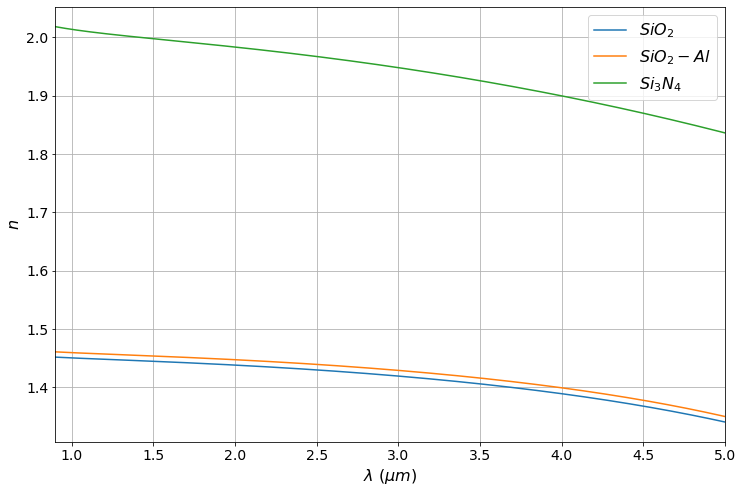

In [390]:
plt.figure(figsize = (12,8))

plt.plot(1e6*λ, n_SiO2_pura, label = r'$SiO_2$')
plt.plot(1e6*λ, n_SiO2_Al, label = r'$SiO_2 - Al$')
plt.plot(1e6*λ, n_Si3N4, label = r'$Si_3N_4$')

plt.xlim(min(1e6*λ), max(1e6*λ))
plt.ylabel(r'$n$', fontsize = 16, fontstyle = 'italic')
plt.xlabel(r'$\lambda\ (\mu m)$', fontsize = 16, fontstyle = 'italic')
plt.tick_params(axis='y', labelsize=14)
plt.tick_params(axis='x', labelsize=14)
plt.grid()
plt.legend(fontsize = 16)

Como $n_{SiO_2}$ é o menor de todos, temos que o material da casca será de sílica pura em ambas as fibras. A fibra com menor raio e maior abertura numérica deverá ter um núcleo de $Si_3N_4$ e a outra de $SiO_2 - Al$.

## 2 - Fibra de raio maior e menor abertura numérica

### 2.1 - Cálculo do raio a

Como $V = 2$, podemos escrever o raio $a$ em função de $\lambda$ da seguinte forma:

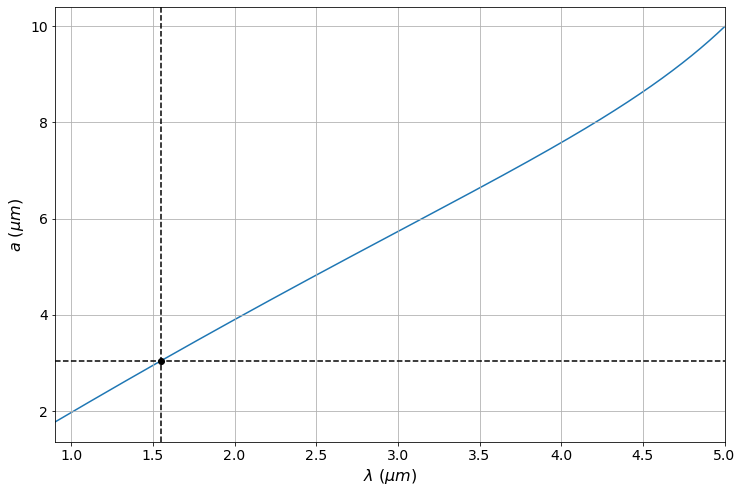

In [391]:
n_co = n_SiO2_Al
n_cl = n_SiO2_pura

a = V_set*λ/(2*np.pi*np.sqrt(n_co**2-n_cl**2))

plt.figure(figsize = (12,8))
plt.plot(1e6*λ, 1e6*a, zorder = 1)
plt.scatter(1e6*λ[K], 1e6*a[K], color = 'k', zorder = 2)

plt.axvline(1e6*λ[K], color = 'k', ls = '--')
plt.axhline(1e6*a[K], color = 'k', ls = '--')

plt.tick_params(axis='y', labelsize=14)
plt.tick_params(axis='x', labelsize=14)
plt.xlim(min(1e6*λ), max(1e6*λ))
plt.ylabel(r'$a\ (\mu m)$', fontsize = 16, fontstyle = 'italic')
plt.xlabel(r'$\lambda\ (\mu m)$', fontsize = 16, fontstyle = 'italic')
plt.grid()

In [392]:
a = a[K]
print("O raio da fibra deve ser de %.2f um" %(1e6*a))

O raio da fibra deve ser de 3.04 um


### 2.2 - Índice de refração efetivo e modos propagados em V = 2

In [393]:
k = np.flip(2*pi/λ)
Δ = (1 - (n_cl/n_co)**2)/2
n_co = np.flip(n_co)
n_cl = np.flip(n_cl)

V = k*a*np.sqrt(n_co**2 - n_cl**2)

<ipython-input-383-c53d3e6f88d4>:17: RuntimeWarning: invalid value encountered in true_divide
  LHS = (u/(m-1)) * jv(m-2,u) / jv(m-1,u)
<ipython-input-383-c53d3e6f88d4>:2: RuntimeWarning: invalid value encountered in sqrt
  v = np.sqrt(V**2 - u**2)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


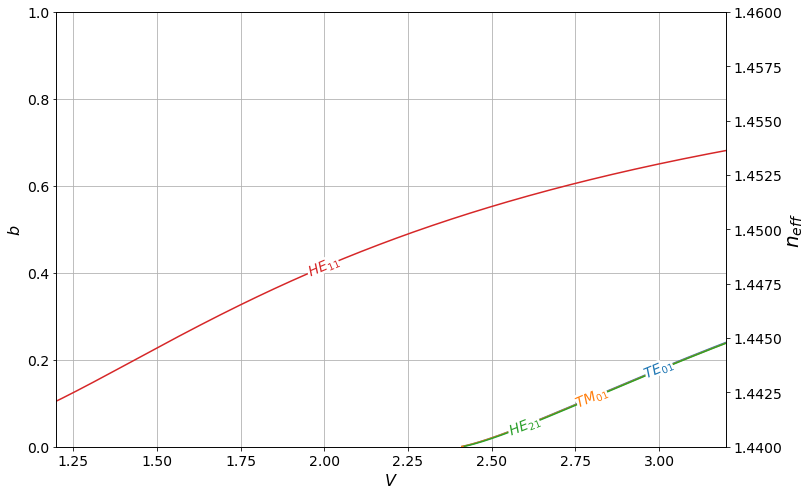

In [394]:
fig, ax = plt.subplots(figsize = (12, 8))

modes = [ ['TE', 0, 1], ['TM', 0, 1], ['HE', 2, 1], ['HE', 1, 1] ]

for i in range(len(modes)):
    u = np.nan*np.zeros(len(V))
    
    p = modes[i][0]
    m = modes[i][1]
    n = modes[i][2]
    
    if(p == 'HE' and m == 1):
        u_cut = np.concatenate( (np.array([0.1]), jn_zeros(1,n)) )[-2]
        V_HE = V[V>=u_cut]
        I = len(V) - len(V_HE)
        
        for j in range(len(V_HE)):
            u[j+I] = fsolve(carac_HE, 1.1*u_cut, args=(V_HE[j], m, n_co[j+I], n_cl[j+I], a, k[j+I]))
        
    elif(p == 'HE' and m != 1):
        u_cut = cutoff_HE(m, V, Δ[50])
        V_HE = V[V>=u_cut]
        I = len(V) - len(V_HE)
        
        for j in range(len(V_HE)):
            u[j+I] = fsolve(carac_HE, 1.0010*u_cut, args=(V_HE[j], m, n_co[j+I], n_cl[j+I], a, k[j+I]))
    
    elif(p == 'EH'):
        u_cut = jn_zeros(m,n)[-1]
        V_EH = V[V>=u_cut]
        I = len(V) - len(V_EH)
        
        for j in range(len(V_EH)):
            u[j+I] = fsolve(carac_EH, 1.001*u_cut, args=(V_EH[j], m, n_co[j+I], n_cl[j+I], a, k[j+I]))
    
    elif(p == 'TE'):
        u_cut = jn_zeros(0,n)[-1]
        V_TE = V[V>=u_cut]
        I = len(V) - len(V_TE)
        
        for j in range(len(V_TE)):
            u[j+I] = fsolve(carac_TE, 1.0001*u_cut, args=(V_TE[j]))
            
    elif(p == 'TM'):
        u_cut = jn_zeros(0,n)[-1]
        V_TM = V[V>=u_cut]
        I = len(V) - len(V_TM)
        
        for j in range(len(V_TM)):
            u[j+I] = fsolve(carac_TM, 1.0001*u_cut, args=(V_TM[j], n_co[j+I], n_cl[j+I]))
    
    neff = np.sqrt(n_co**2 - (u/(a*k))**2)
    b = (neff**2 - n_cl**2) / (n_co**2 - n_cl**2)
    
    ax.plot(V, b, label = '$'+ modes[i][0] + '_{' + str(modes[i][1]) + str(modes[i][2]) +'} $')

labelLines(ax.get_lines(), xvals = [3, 2.8, 2.6, 2], fontsize = 14 )
ax.set_ylim(0, 1)
ax.set_xlim(1.2, 3.2)
ax.set_xlabel(r'$V$', fontsize = 16, fontstyle = 'italic')
ax.set_ylabel(r'$b$', fontsize = 16, fontstyle = 'italic')
ax.tick_params(axis='y', labelsize=14)
ax.tick_params(axis='x', labelsize=14)
ax.grid()

ax1 = ax.twinx()
ax1.set_ylim(1.44, 1.46)
ax1.set_ylabel(r'$n_{eff}$', fontsize = 20, fontstyle = 'italic')
ax1.tick_params(axis='y', labelsize=14)

In [395]:
np.flip(neff)[K]

array([1.44781144])

### 2.3 - Dispersão material

Calculemos, antes, o índice de grupo da casca, definido como

$$
n_{2_g} = n_2 - \lambda\dfrac{n_2}{d\lambda}
$$

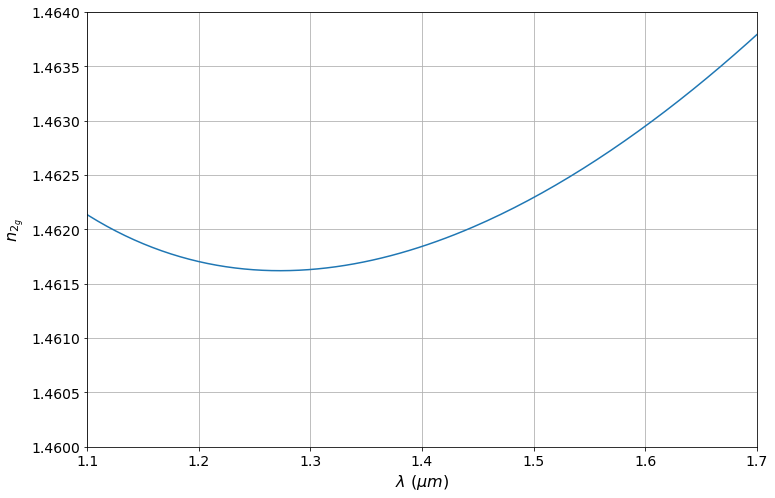

In [396]:
n_cl = np.flip(n_cl)
n2g  = n_cl - λ*np.gradient(n_cl, λ)

plt.figure(figsize = (12, 8))

plt.plot(1e6*λ,n2g)
plt.ylabel(r'$n_{2_g}$', fontsize = 16, fontstyle = 'italic')
plt.xlabel(r'$\lambda\ (\mu m)$', fontsize = 16, fontstyle = 'italic')
plt.tick_params(axis='y', labelsize=14)
plt.tick_params(axis='x', labelsize=14)
plt.xlim(1.1,1.7)
plt.ylim(1.46,1.464)
plt.grid()

A dispersão material é dada por:

$$
D_M = \dfrac{1}{c}\dfrac{d n_{2_g}}{d\lambda}
$$

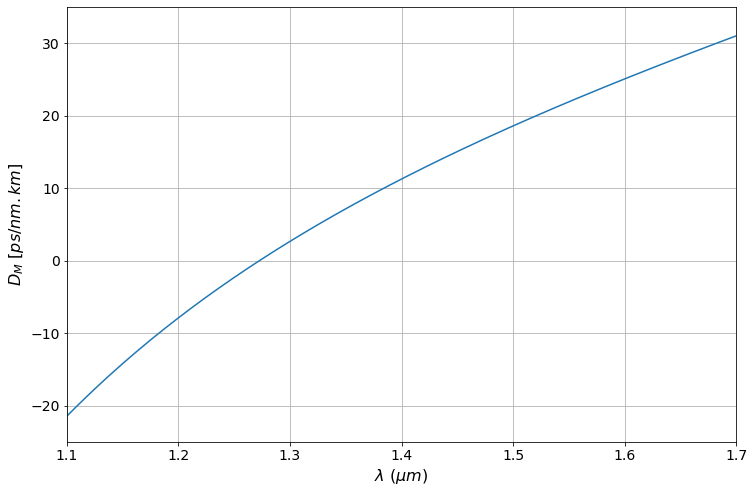

In [397]:
Dm = (1/c)*np.gradient(n2g, λ)

plt.figure(figsize = (12, 8))
plt.plot(1e6*λ,1e6*Dm)

plt.ylabel(r'$D_M\ [ps/nm . km]$', fontsize = 16, fontstyle = 'italic')
plt.xlabel(r'$\lambda\ (\mu m)$', fontsize = 16, fontstyle = 'italic')
plt.tick_params(axis='y', labelsize=14)
plt.tick_params(axis='x', labelsize=14)
plt.xlim(1.1,1.7)
plt.ylim(-25,35)
plt.grid()

### 2.4 - Dispersão do guia de onda

A segunda componente da dispersão é a relativa aos efeitos do guia, expressa por:

$$
D_W = -\dfrac{2\pi\Delta}{\lambda^2}\left(\dfrac{n_{2_g}^2}{n_2\omega}\dfrac{Vd^2(Vb)}{dV^2} + \dfrac{n_{2_g}}{d\omega}\dfrac{d(Vb)}{dV} \right)
$$

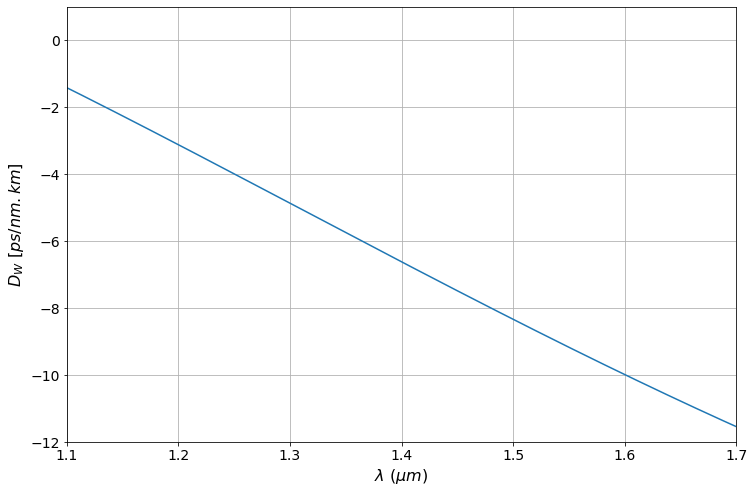

In [398]:
w = np.flip(2*pi*c/λ)
Dw = -(2*pi*Δ/λ**2)*( (n2g**2/(n_cl*np.flip(w)))* np.flip(V) * np.flip(np.gradient(np.gradient(b*V,V), V))  + (np.flip(np.gradient(np.flip(n2g),w)))*np.flip(np.gradient(V*b,V))  )

plt.figure(figsize = (12, 8))
plt.plot(1e6*λ,1e6*Dw)

plt.ylabel(r'$D_W\ [ps/nm . km]$', fontsize = 16, fontstyle = 'italic')
plt.xlabel(r'$\lambda\ (\mu m)$', fontsize = 16, fontstyle = 'italic')
plt.tick_params(axis='y', labelsize=14)
plt.tick_params(axis='x', labelsize=14)
plt.xlim(1.1,1.7)
plt.ylim(-12,1)
plt.grid()

### 2.5 - Dispersão total

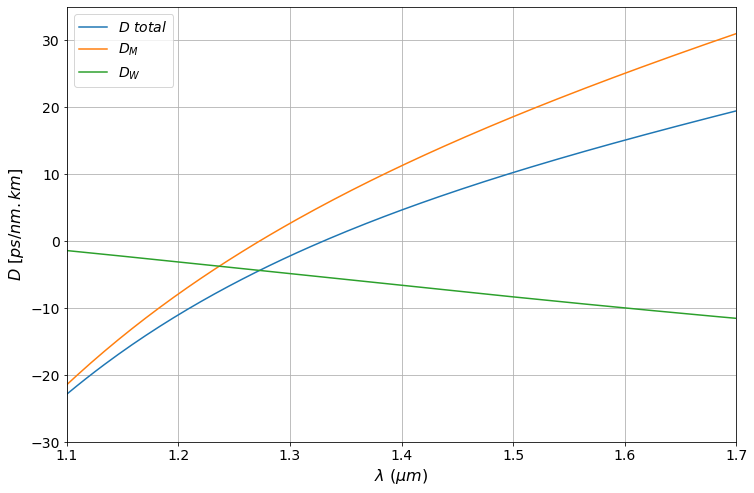

In [399]:
D = Dm + Dw

plt.figure(figsize = (12, 8))
plt.plot(1e6*λ,1e6*D,  label = r'$D\ total$')
plt.plot(1e6*λ,1e6*Dm, label = r'$D_M$')
plt.plot(1e6*λ,1e6*Dw, label = r'$D_W$')

plt.ylabel(r'$D\ [ps/nm . km]$', fontsize = 16, fontstyle = 'italic')
plt.xlabel(r'$\lambda\ (\mu m)$', fontsize = 16, fontstyle = 'italic')
plt.tick_params(axis='y', labelsize=14)
plt.tick_params(axis='x', labelsize=14)
plt.xlim(1.1,1.7)
plt.ylim(-30,35)
plt.legend(fontsize = 14)
plt.grid()

In [400]:
print("A dispersão total para lambda = 1.55 um é de %.2f ps/nm.km" %(D[K]*1e6))

A dispersão total para lambda = 1.55 um é de 12.66 ps/nm.km


### 2.6 - Alargamento do pulso no tempo

Ao aplicarmos um pulso de largura espectral $\Delta\lambda_0 = 2\ nm$ com $\lambda = 1.55\ \mu m$, após $10\ km$, o sinal sofrerá o seguinte alargamento:

In [401]:
Δλ = 2   # nm
z  = 10  # km

print("Δt = %.3f ps" %(D[K]*1e6*z*Δλ) )

Δt = 253.251 ps


## 3 - Fibra de raio menor e maior abertura numérica

A segunda fibra será composta então pela sílica pura na casca e pelo nitreto de silício no núcleo, garantindo então um alto contraste de índice. Repetiremos agora os mesmos procedimentos anteriores, agora com essa nova estrutura.

### 3.1 - Cálculo do raio a

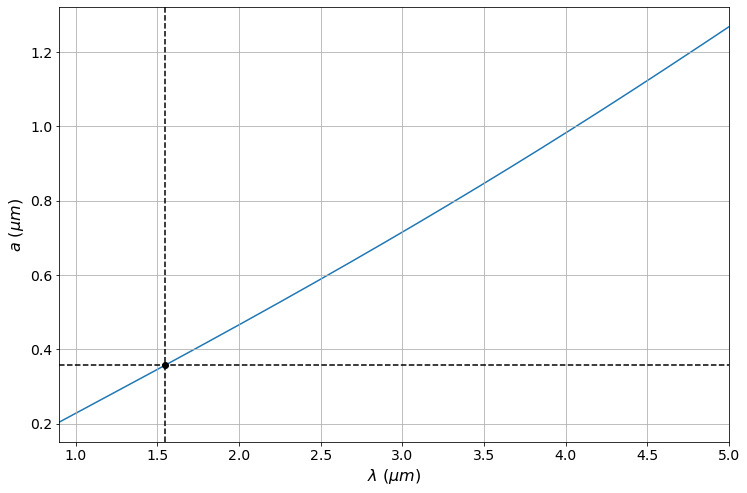

In [402]:
n_co = n_Si3N4
n_cl = n_SiO2_pura

a = V_set*λ/(2*np.pi*np.sqrt(n_co**2-n_cl**2))

plt.figure(figsize = (12,8))
plt.plot(1e6*λ, 1e6*a, zorder = 1)
plt.scatter(1e6*λ[K], 1e6*a[K], color = 'k', zorder = 2)

plt.axvline(1e6*λ[K], color = 'k', ls = '--')
plt.axhline(1e6*a[K], color = 'k', ls = '--')

plt.tick_params(axis='y', labelsize=14)
plt.tick_params(axis='x', labelsize=14)
plt.xlim(min(1e6*λ), max(1e6*λ))
plt.ylabel(r'$a\ (\mu m)$', fontsize = 16, fontstyle = 'italic')
plt.xlabel(r'$\lambda\ (\mu m)$', fontsize = 16, fontstyle = 'italic')
plt.grid()

In [403]:
a = a[K]
print("O raio da fibra deve ser de %.2f um" %(1e6*a))

O raio da fibra deve ser de 0.36 um


### 3.2 - Índice de refração efetivo e modos propagados em V = 2

In [404]:
k = np.flip(2*pi/λ)
Δ = (1 - (n_cl/n_co)**2)/2
n_co = np.flip(n_co)
n_cl = np.flip(n_cl)

V = k*a*np.sqrt(n_co**2 - n_cl**2)

<ipython-input-386-db090bd05cf2>:2: RuntimeWarning: invalid value encountered in sqrt
  v = np.sqrt(V**2 - u**2)
<ipython-input-383-c53d3e6f88d4>:17: RuntimeWarning: invalid value encountered in true_divide
  LHS = (u/(m-1)) * jv(m-2,u) / jv(m-1,u)
<ipython-input-383-c53d3e6f88d4>:2: RuntimeWarning: invalid value encountered in sqrt
  v = np.sqrt(V**2 - u**2)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
<ipython-input-383-c53d3e6f88d4>:2: RuntimeWarning: invalid value encountered in sqrt
  v = np.sqrt(V**2 - u**2)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


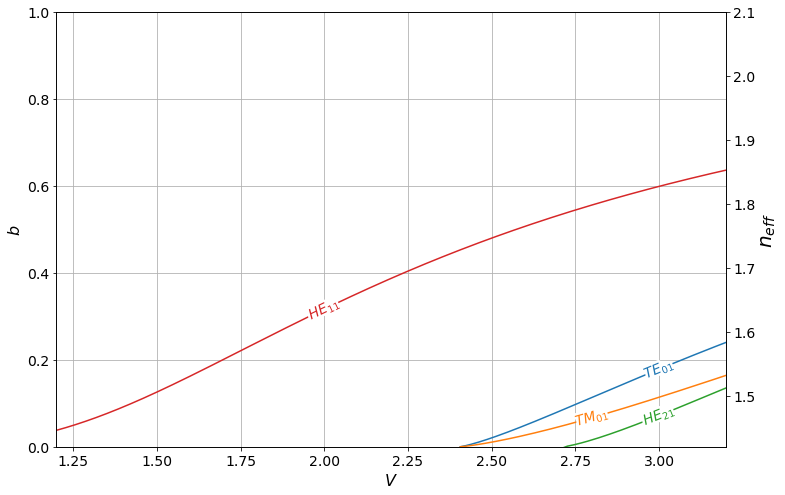

In [405]:
fig, ax = plt.subplots(figsize = (12, 8))

modes = [ ['TE', 0, 1], ['TM', 0, 1], ['HE', 2, 1], ['HE', 1, 1] ]

for i in range(len(modes)):
    u = np.nan*np.zeros(len(V))
    
    p = modes[i][0]
    m = modes[i][1]
    n = modes[i][2]
    
    if(p == 'HE' and m == 1):
        u_cut = np.concatenate( (np.array([0.1]), jn_zeros(1,n)) )[-2]
        V_HE = V[V>=u_cut]
        I = len(V) - len(V_HE)
        
        for j in range(len(V_HE)):
            u[j+I] = fsolve(carac_HE, 1.1*u_cut, args=(V_HE[j], m, n_co[j+I], n_cl[j+I], a, k[j+I]))
        
    elif(p == 'HE' and m != 1):
        u_cut = cutoff_HE(m, V, Δ[50])
        V_HE = V[V>=u_cut]
        I = len(V) - len(V_HE)
        
        for j in range(len(V_HE)):
            u[j+I] = fsolve(carac_HE, 1.0010*u_cut, args=(V_HE[j], m, n_co[j+I], n_cl[j+I], a, k[j+I]))
    
    elif(p == 'EH'):
        u_cut = jn_zeros(m,n)[-1]
        V_EH = V[V>=u_cut]
        I = len(V) - len(V_EH)
        
        for j in range(len(V_EH)):
            u[j+I] = fsolve(carac_EH, 1.001*u_cut, args=(V_EH[j], m, n_co[j+I], n_cl[j+I], a, k[j+I]))
    
    elif(p == 'TE'):
        u_cut = jn_zeros(0,n)[-1]
        V_TE = V[V>=u_cut]
        I = len(V) - len(V_TE)
        
        for j in range(len(V_TE)):
            u[j+I] = fsolve(carac_TE, 1.0001*u_cut, args=(V_TE[j]))
            
    elif(p == 'TM'):
        u_cut = jn_zeros(0,n)[-1]
        V_TM = V[V>=u_cut]
        I = len(V) - len(V_TM)
        
        for j in range(len(V_TM)):
            u[j+I] = fsolve(carac_TM, 1.0001*u_cut, args=(V_TM[j], n_co[j+I], n_cl[j+I]))
    
    neff = np.sqrt(n_co**2 - (u/(a*k))**2)
    b = (neff**2 - n_cl**2) / (n_co**2 - n_cl**2)
    
    ax.plot(V, b, label = '$'+ modes[i][0] + '_{' + str(modes[i][1]) + str(modes[i][2]) +'} $')

labelLines(ax.get_lines(), xvals = [3, 2.8, 3, 2], fontsize = 14 )
ax.set_ylim(0, 1)
ax.set_xlim(1.2, 3.2)
ax.set_xlabel(r'$V$', fontsize = 16, fontstyle = 'italic')
ax.set_ylabel(r'$b$', fontsize = 16, fontstyle = 'italic')
ax.tick_params(axis='y', labelsize=14)
ax.tick_params(axis='x', labelsize=14)
ax.grid()

ax1 = ax.twinx()
ax1.set_ylim(1.42, 2.10)
ax1.set_ylabel(r'$n_{eff}$', fontsize = 20, fontstyle = 'italic')
ax1.tick_params(axis='y', labelsize=14)

In [406]:
np.flip(neff)[K]

array([1.63917011])

### 3.3 - Dispersão material

Como a dispersão material depende do índice de grupo da casca, e a casca nesta fibra é a mesma da anterior, então não há alteração nesse parâmetro.

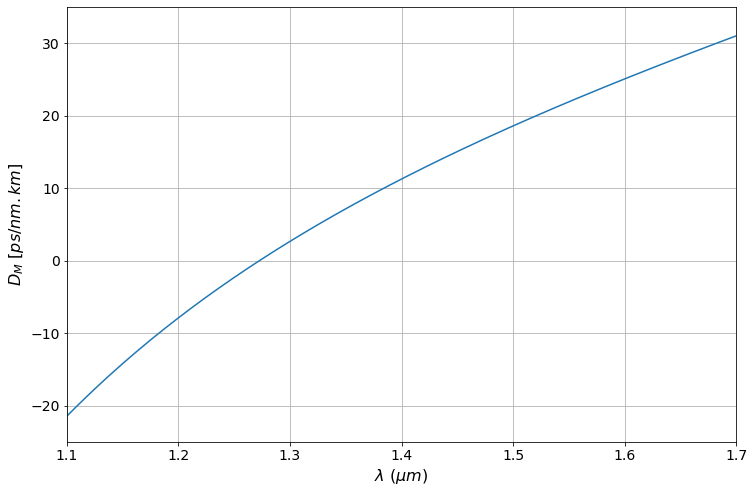

In [407]:
Dm = (1/c)*np.gradient(n2g, λ)

plt.figure(figsize = (12, 8))
plt.plot(1e6*λ,1e6*Dm)

plt.ylabel(r'$D_M\ [ps/nm . km]$', fontsize = 16, fontstyle = 'italic')
plt.xlabel(r'$\lambda\ (\mu m)$', fontsize = 16, fontstyle = 'italic')
plt.tick_params(axis='y', labelsize=14)
plt.tick_params(axis='x', labelsize=14)
plt.xlim(1.1,1.7)
plt.ylim(-25,35)
plt.grid()

### 3.4 - Dispersão do guia de onda

Este é o parâmetro que mais sofre modificação em relação à fibra anterior. Note que o índice efetivo desta fibra varia de forma mais acentuada em relação $\lambda$ do que o da outra fibra, isso porque o contraste entre os índices do núcleo e da casca é maior, e como essa variação afeta diretamente na expressão de $D_W$, nota-se então um valor de dispersão do guia muito mais negativa. Outra forma de enxergar isso é lembramo-nos de que o aumento da diferença de índice confina mais o modo, e este confinamento é responsável então por "achatá-lo" no guia, o que se reflete em um encurtamento de seu pulso no domínio do tempo.

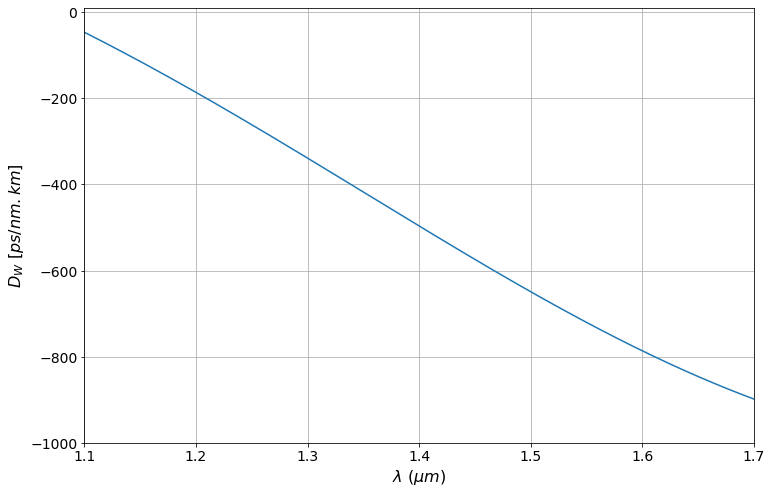

In [408]:
w = np.flip(2*pi*c/λ)
Dw = -(2*pi*Δ/λ**2)*( (n2g**2/(n_cl*np.flip(w)))* np.flip(V) * np.flip(np.gradient(np.gradient(b*V,V), V))  + (np.flip(np.gradient(np.flip(n2g),w)))*np.flip(np.gradient(V*b,V))  )

plt.figure(figsize = (12, 8))
plt.plot(1e6*λ,1e6*Dw)

plt.ylabel(r'$D_W\ [ps/nm . km]$', fontsize = 16, fontstyle = 'italic')
plt.xlabel(r'$\lambda\ (\mu m)$', fontsize = 16, fontstyle = 'italic')
plt.tick_params(axis='y', labelsize=14)
plt.tick_params(axis='x', labelsize=14)
plt.xlim(1.1,1.7)
plt.ylim(-1000,10)
plt.grid()

### 3.5 - Dispersão total

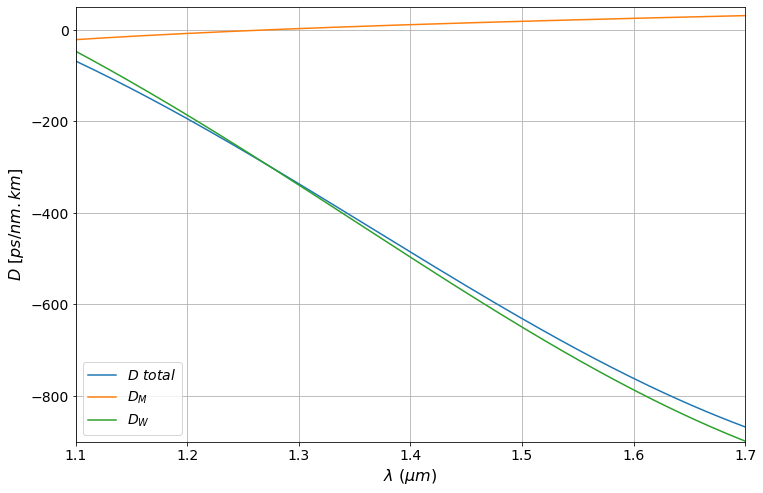

In [409]:
D = Dm + Dw

plt.figure(figsize = (12, 8))
plt.plot(1e6*λ,1e6*D,  label = r'$D\ total$')
plt.plot(1e6*λ,1e6*Dm, label = r'$D_M$')
plt.plot(1e6*λ,1e6*Dw, label = r'$D_W$')

plt.ylabel(r'$D\ [ps/nm . km]$', fontsize = 16, fontstyle = 'italic')
plt.xlabel(r'$\lambda\ (\mu m)$', fontsize = 16, fontstyle = 'italic')
plt.tick_params(axis='y', labelsize=14)
plt.tick_params(axis='x', labelsize=14)
plt.xlim(1.1,1.7)
plt.ylim(-900,50)
plt.legend(fontsize = 14)
plt.grid()

In [410]:
print("A dispersão total para lambda = 1.55 um é de %.2f ps/nm.km" %(D[K]*1e6))

A dispersão total para lambda = 1.55 um é de -696.58 ps/nm.km


### 3.6 - Alargamento do pulso no tempo

In [411]:
Δλ = 2  # nm
z  = 10 # km

print("Δt = %.3f ps" %(D[K]*1e6*z*Δλ) )

Δt = -13931.521 ps


# Conclusão
Na tabela abaixo, estão listadas os principais parâmetros das fibras I (raio maior e NA menor) e II (raio menor e NA maior) para $\lambda = 1.55\ \mu m$ em relação ao modo fundamental.

| |a (um)| neff | D (ps/nm.km) | Δt (ps) |
|---|---|---|---|---|
| Fibra I | 3.04 | 1.448 |  12.66 | 253.251 |
| Fibra II| 0.36 | 1.639 | -696.58 | -13931.521  |

A fibra II é mais propícia para atuar como compensadora de dispersão, dado o valor deste parâmetro ser tão negativo. A fibra I assemelha-se às fibras SMF convencionais, portanto, é recomendado seu uso para transmissão de alta taxa.